#### [HIV/Aids and Tuberculosis]


In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
#create a dataframe from each excel sheet.

filepath = "Data Files/Cleaned Files/Copy of mort_cleaned.xlsx"

xls = pd.ExcelFile(filepath)
df_HIV_AIDS_tuberculosis = pd.read_excel(xls, 'HIV-AIDS & tuberculosis')


In [3]:
filepath2 = "Data Files/Cleaned Files/NIH Data Alcohol Consumption.csv"
filepath3 = "Data Files/Cleaned Files/NIH Data FIPS.csv"
filepath4 = "Data Files/Cleaned Files/NIH Beverage Codes.csv"

df_nih = pd.read_csv(filepath2)
df_beverage_codes = pd.read_csv(filepath4)
df_fips_codes = pd.read_csv(filepath3)



In [4]:
df_nih['Gallons of ethanol per capita age 21 and older'] = df_nih['Gallons of ethanol per capita age 21 and older']/10000

In [5]:
df_nih.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,0.8606,9.0,.,.,.
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,0.1118,9.0,.,.,.
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,0.7373,10.0,.,.,.
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,1.7097,10.0,.,.,.
4,1970,2,1,945000,425250,205000,20744,1.0,165000,2.5773,1.0,.,.,.


In [6]:
df_nih_merged = pd.merge(df_nih, df_beverage_codes, how="left", left_on = 'Type of beverage', right_on = 'Beverage ID')
df_nih_merged = pd.merge(df_nih_merged, df_fips_codes, how="left", left_on = 'FIPS', right_on = 'FIPS')

In [7]:
df_nih_merged.head()

,Year,FIPS,Type of beverage,Gallons of beverage,Gallons of ethanol,Population (14 and older),Gallons of ethanol per capita age 14 and older,Decile for per capita consumption age 14 and older,Population (21 and older),Gallons of ethanol per capita age 21 and older,Decile for per capita consumption age 21 and older,Type of data source,Time-varying alcohol by volume (ABV),Gallons of ethanol derived from time-varying ABV,Beverage ID,Beverage Type,State
0,1970,1,1,3863000,1738350,2499000,6956,9.0,2020000,0.8606,9.0,.,.,.,1,Spirits,Alabama
1,1970,1,2,1412000,225920,2499000,904,9.0,2020000,0.1118,9.0,.,.,.,2,Wine,Alabama
2,1970,1,3,33098000,1489410,2499000,5960,10.0,2020000,0.7373,10.0,.,.,.,3,Beer,Alabama
3,1970,1,4,.,3453680,2499000,13820,10.0,2020000,1.7097,10.0,.,.,.,4,All Beverages,Alabama
4,1970,2,1,945000,425250,205000,20744,1.0,165000,2.5773,1.0,.,.,.,1,Spirits,Alaska


In [8]:
# Create subsets for year

nih_1980 = df_nih_merged.loc[(df_nih_merged['Year'] == 1980) & (df_nih_merged['FIPS'] < 60)]
nih_1985 = df_nih_merged.loc[(df_nih_merged['Year'] == 1985) & (df_nih_merged['FIPS'] < 60)]
nih_1990 = df_nih_merged.loc[(df_nih_merged['Year'] == 1990) & (df_nih_merged['FIPS'] < 60)]
nih_1995 = df_nih_merged.loc[(df_nih_merged['Year'] == 1995) & (df_nih_merged['FIPS'] < 60)]
nih_2000 = df_nih_merged.loc[(df_nih_merged['Year'] == 2000) & (df_nih_merged['FIPS'] < 60)]
nih_2005 = df_nih_merged.loc[(df_nih_merged['Year'] == 2005) & (df_nih_merged['FIPS'] < 60)]
nih_2010 = df_nih_merged.loc[(df_nih_merged['Year'] == 2010) & (df_nih_merged['FIPS'] < 60)]
nih_2014 = df_nih_merged.loc[(df_nih_merged['Year'] == 2014) & (df_nih_merged['FIPS'] < 60)]

In [10]:
# Get States Data from HIV/Aids DataFrame
df_states_hiv_aids = df_HIV_AIDS_tuberculosis.loc[df_HIV_AIDS_tuberculosis['FIPS'] < 60]


In [12]:
df_states_hiv_aids.head()

,Location,FIPS,"Mortality Rate, 1980*","Mortality Rate, 1985*","Mortality Rate, 1990*","Mortality Rate, 1995*","Mortality Rate, 2000*","Mortality Rate, 2005*","Mortality Rate, 2010*","Mortality Rate, 2014*","% Change in Mortality Rate, 1980-2014"
1,Alabama,1.0,"1.46 (1.33, 1.59)","2.15 (2.03, 2.27)","8.03 (7.79, 8.25)","14.10 (13.76, 14.43)","5.47 (5.30, 5.65)","4.67 (4.51, 4.83)","3.35 (3.21, 3.50)","2.94 (2.80, 3.08)","101.52 (82.33, 124.12)"
69,Alaska,2.0,"2.91 (2.01, 4.05)","2.55 (1.92, 3.32)","5.49 (4.79, 6.27)","8.19 (7.47, 8.93)","2.84 (2.50, 3.23)","2.34 (2.03, 2.70)","1.50 (1.24, 1.83)","1.27 (1.01, 1.59)","-56.38 (-71.72, -31.73)"
99,Arizona,4.0,"1.61 (1.43, 1.82)","2.28 (2.11, 2.46)","8.90 (8.59, 9.19)","13.18 (12.84, 13.50)","4.16 (4.00, 4.36)","3.37 (3.20, 3.53)","2.14 (2.01, 2.28)","1.82 (1.70, 1.96)","13.10 (-1.00, 31.06)"
115,Arkansas,5.0,"1.03 (0.93, 1.14)","1.51 (1.41, 1.61)","6.33 (6.11, 6.54)","11.02 (10.72, 11.32)","3.79 (3.64, 3.93)","3.38 (3.23, 3.54)","2.34 (2.21, 2.47)","2.10 (1.98, 2.25)","103.94 (81.15, 132.37)"
191,California,6.0,"2.00 (1.88, 2.15)","4.47 (4.36, 4.59)","15.64 (15.44, 15.84)","19.68 (19.47, 19.89)","5.84 (5.74, 5.94)","4.73 (4.64, 4.82)","2.95 (2.89, 3.02)","2.47 (2.40, 2.54)","23.18 (14.42, 32.47)"


In [13]:
# Create new dataframe for hiv_aids abuse for each year

nih_1980_merged_hiv_aids = pd.merge(nih_1980, df_states_hiv_aids, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1985_merged_hiv_aids = pd.merge(nih_1985, df_states_hiv_aids, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1990_merged_hiv_aids = pd.merge(nih_1990, df_states_hiv_aids, how = 'left', left_on = 'State', right_on = 'Location' )
nih_1995_merged_hiv_aids = pd.merge(nih_1995, df_states_hiv_aids, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2000_merged_hiv_aids = pd.merge(nih_2000, df_states_hiv_aids, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2005_merged_hiv_aids = pd.merge(nih_2005, df_states_hiv_aids, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2010_merged_hiv_aids = pd.merge(nih_2010, df_states_hiv_aids, how = 'left', left_on = 'State', right_on = 'Location' )
nih_2014_merged_hiv_aids = pd.merge(nih_2014, df_states_hiv_aids, how = 'left', left_on = 'State', right_on = 'Location' )

In [14]:
# Grab only needed columns (don't forget to change year number in Mortality Rate column)
nih_1980_merged_hiv_aids = nih_1980_merged_hiv_aids[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1980*','Location']]
nih_1985_merged_hiv_aids = nih_1985_merged_hiv_aids[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1985*','Location']]
nih_1990_merged_hiv_aids = nih_1990_merged_hiv_aids[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1990*','Location']]
nih_1995_merged_hiv_aids = nih_1995_merged_hiv_aids[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 1995*','Location']]
nih_2000_merged_hiv_aids = nih_2000_merged_hiv_aids[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2000*','Location']]
nih_2005_merged_hiv_aids = nih_2005_merged_hiv_aids[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2005*','Location']]
nih_2010_merged_hiv_aids = nih_2010_merged_hiv_aids[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2010*','Location']]
nih_2014_merged_hiv_aids = nih_2014_merged_hiv_aids[['Year','FIPS_x','Type of beverage', 'Gallons of ethanol per capita age 21 and older','Mortality Rate, 2014*','Location']]

In [15]:
# Rename Mortality Rate column
nih_1980_merged_hiv_aids.rename(columns={"Mortality Rate, 1980*": "Mortality Rate"}, inplace = True)
nih_1985_merged_hiv_aids.rename(columns={"Mortality Rate, 1985*": "Mortality Rate"}, inplace = True)
nih_1990_merged_hiv_aids.rename(columns={"Mortality Rate, 1990*": "Mortality Rate"}, inplace = True)
nih_1995_merged_hiv_aids.rename(columns={"Mortality Rate, 1995*": "Mortality Rate"}, inplace = True)
nih_2000_merged_hiv_aids.rename(columns={"Mortality Rate, 2000*": "Mortality Rate"}, inplace = True)
nih_2005_merged_hiv_aids.rename(columns={"Mortality Rate, 2005*": "Mortality Rate"}, inplace = True)
nih_2010_merged_hiv_aids.rename(columns={"Mortality Rate, 2010*": "Mortality Rate"}, inplace = True)
nih_2014_merged_hiv_aids.rename(columns={"Mortality Rate, 2014*": "Mortality Rate"}, inplace = True)

In [16]:

# Concatenate all year dataframes
frames_hiv_aids = [nih_1980_merged_hiv_aids, 
                    nih_1985_merged_hiv_aids,
                    nih_1990_merged_hiv_aids,
                    nih_1995_merged_hiv_aids,
                    nih_2000_merged_hiv_aids,
                    nih_2005_merged_hiv_aids,
                    nih_2010_merged_hiv_aids,
                    nih_2014_merged_hiv_aids]

df_concat_hiv_aids = pd.concat(frames_hiv_aids)

df_concat_hiv_aids

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location
0,1980,1,1,0.8959,"1.46 (1.33, 1.59)",Alabama
1,1980,1,2,0.1960,"1.46 (1.33, 1.59)",Alabama
2,1980,1,3,1.1504,"1.46 (1.33, 1.59)",Alabama
3,1980,1,4,2.2423,"1.46 (1.33, 1.59)",Alabama
4,1980,2,1,2.0345,"2.91 (2.01, 4.05)",Alaska
...,...,...,...,...,...,...
199,2014,55,4,3.3634,"0.75 (0.69, 0.81)",Wisconsin
200,2014,56,1,1.3061,"0.46 (0.39, 0.54)",Wyoming
201,2014,56,2,0.3460,"0.46 (0.39, 0.54)",Wyoming
202,2014,56,3,1.4129,"0.46 (0.39, 0.54)",Wyoming


In [20]:
df_concat_hiv_aids = pd.merge(df_concat_hiv_aids,df_beverage_codes, how='left', left_on ='Type of beverage', right_on = 'Beverage ID')

In [21]:
df_concat_hiv_aids_clean = df_concat_hiv_aids['Mortality Rate'].str.split(' ').str.get(0).astype(float)

In [22]:
df_concat_hiv_aids['Mortality Rate'] = df_concat_hiv_aids_clean

In [23]:
df_concat_hiv_aids

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
0,1980,1,1,0.8959,1.46,Alabama,1,Spirits
1,1980,1,2,0.1960,1.46,Alabama,2,Wine
2,1980,1,3,1.1504,1.46,Alabama,3,Beer
3,1980,1,4,2.2423,1.46,Alabama,4,All Beverages
4,1980,2,1,2.0345,2.91,Alaska,1,Spirits
...,...,...,...,...,...,...,...,...
1627,2014,55,4,3.3634,0.75,Wisconsin,4,All Beverages
1628,2014,56,1,1.3061,0.46,Wyoming,1,Spirits
1629,2014,56,2,0.3460,0.46,Wyoming,2,Wine
1630,2014,56,3,1.4129,0.46,Wyoming,3,Beer


In [24]:
# Isolate rows for all beverages
df_concat_hiv_aids4 = df_concat_hiv_aids.loc[df_concat_hiv_aids['Beverage ID'] == 4]
df_concat_hiv_aids1 = df_concat_hiv_aids.loc[df_concat_hiv_aids['Beverage ID'] == 1]
df_concat_hiv_aids2 = df_concat_hiv_aids.loc[df_concat_hiv_aids['Beverage ID'] == 2]
df_concat_hiv_aids3 = df_concat_hiv_aids.loc[df_concat_hiv_aids['Beverage ID'] == 3]


In [25]:
df_concat_hiv_aids4.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,408.00000,408.000000,408.0,408.000000,392.000000,408.0
mean,1997.37500,28.960784,4.0,2.849246,4.585485,4.0
std,11.28257,15.696083,0.0,0.729356,4.904087,0.0
min,1980.00000,1.000000,4.0,1.473000,0.460000,4.0
25%,1988.75000,16.000000,4.0,2.393375,1.427500,4.0
50%,1997.50000,29.000000,4.0,2.694700,2.770000,4.0
75%,2006.25000,42.000000,4.0,3.115325,5.967500,4.0
max,2014.00000,56.000000,4.0,6.772300,36.530000,4.0


In [26]:
# Remove nulls

df_concat_hiv_aids4.dropna(inplace=True)
df_concat_hiv_aids1.dropna(inplace=True)
df_concat_hiv_aids2.dropna(inplace=True)
df_concat_hiv_aids3.dropna(inplace=True)

C:\Users\Leha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Leha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Leha\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [27]:
df_concat_hiv_aids2.describe()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Beverage ID
count,392.000000,392.000000,392.0,392.000000,392.000000,392.0
mean,1997.375000,29.244898,2.0,0.367686,4.585485,2.0
std,11.283135,15.793463,0.0,0.173134,4.904087,0.0
min,1980.000000,1.000000,2.0,0.097600,0.460000,2.0
25%,1988.750000,17.000000,2.0,0.229150,1.427500,2.0
50%,1997.500000,29.000000,2.0,0.338750,2.770000,2.0
75%,2006.250000,42.000000,2.0,0.489050,5.967500,2.0
max,2014.000000,56.000000,2.0,0.964900,36.530000,2.0


In [28]:
df_concat_hiv_aids2

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
1,1980,1,2,0.1960,1.46,Alabama,2,Wine
5,1980,2,2,0.6036,2.91,Alaska,2,Wine
9,1980,4,2,0.4277,1.61,Arizona,2,Wine
13,1980,5,2,0.1464,1.03,Arkansas,2,Wine
17,1980,6,2,0.8406,2.00,California,2,Wine
...,...,...,...,...,...,...,...,...
1613,2014,51,2,0.5323,1.94,Virginia,2,Wine
1617,2014,53,2,0.5924,1.19,Washington,2,Wine
1621,2014,54,2,0.1086,0.94,West Virginia,2,Wine
1625,2014,55,2,0.4269,0.75,Wisconsin,2,Wine


In [29]:
x_values4 = df_concat_hiv_aids4['Gallons of ethanol per capita age 21 and older']
y_values4 = df_concat_hiv_aids4['Mortality Rate']

x_values1 = df_concat_hiv_aids1['Gallons of ethanol per capita age 21 and older']
y_values1 = df_concat_hiv_aids1['Mortality Rate']

x_values2 = df_concat_hiv_aids2['Gallons of ethanol per capita age 21 and older']
y_values2 = df_concat_hiv_aids2['Mortality Rate']

x_values3 = df_concat_hiv_aids3['Gallons of ethanol per capita age 21 and older']
y_values3 = df_concat_hiv_aids3['Mortality Rate']

Text(0, 0.5, 'Mortality Rate')

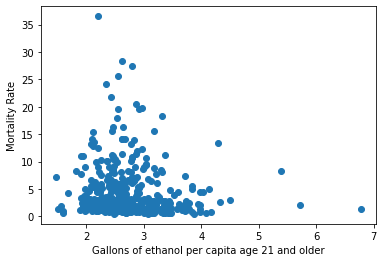

In [30]:
plt.scatter(x_values4,y_values4)
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')

In [31]:
# Calculate correlation

corr4= st.pearsonr(x_values4,y_values4)
corr1= st.pearsonr(x_values1,y_values1)
corr2= st.pearsonr(x_values2,y_values2)
corr3= st.pearsonr(x_values3,y_values3)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values2, y_values2)
regress_values2 = x_values2 * slope + intercept
line_eq2 = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))




print(f"The correlation between ethanol consumption and mortality rate for all beverages is {corr4}")
print(f"The correlation between ethanol consumption and mortality rate for spirits is {corr1}")
print(f"The correlation between ethanol consumption and mortality rate for wine is {corr2}")
print(f"The correlation between ethanol consumption and mortality rate for beer is {corr3}")

The correlation between ethanol consumption and mortality rate for all beverages is (-0.1373862903361243, 0.006442760566429661)
The correlation between ethanol consumption and mortality rate for spirits is (-0.17831108401072157, 0.0003887935790864902)
The correlation between ethanol consumption and mortality rate for wine is (0.0003413360414561313, 0.9946250695761784)
The correlation between ethanol consumption and mortality rate for beer is (-0.09650018828249507, 0.05626698348942179)


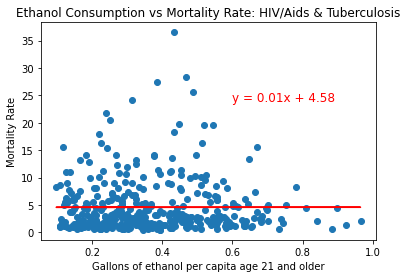

In [33]:
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values2,"r-")
plt.annotate(line_eq2,(0.6,24),fontsize=12,color="red")
plt.xlabel('Gallons of ethanol per capita age 21 and older')
plt.ylabel('Mortality Rate')
plt.title('Ethanol Consumption vs Mortality Rate: HIV/Aids & Tuberculosis')
plt.savefig('Images/HIV-Aids_scatter_allyears.png')
plt.show()

In [34]:
# Outliers

df_concat_hiv_aids4_1980 = df_concat_hiv_aids4.loc[df_concat_hiv_aids4['Year'] == 1980]
df_concat_hiv_aids4_1985 = df_concat_hiv_aids4.loc[df_concat_hiv_aids4['Year'] == 1985]
df_concat_hiv_aids4_1990 = df_concat_hiv_aids4.loc[df_concat_hiv_aids4['Year'] == 1990]
df_concat_hiv_aids4_1995 = df_concat_hiv_aids4.loc[df_concat_hiv_aids4['Year'] == 1995]
df_concat_hiv_aids4_2000 = df_concat_hiv_aids4.loc[df_concat_hiv_aids4['Year'] == 2000]
df_concat_hiv_aids4_2005 = df_concat_hiv_aids4.loc[df_concat_hiv_aids4['Year'] == 2005]
df_concat_hiv_aids4_2010 = df_concat_hiv_aids4.loc[df_concat_hiv_aids4['Year'] == 2010]
df_concat_hiv_aids4_2014 = df_concat_hiv_aids4.loc[df_concat_hiv_aids4['Year'] == 2014]

In [35]:
df_concat_hiv_aids4_1980.head()

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
3,1980,1,4,2.2423,1.46,Alabama,4,All Beverages
7,1980,2,4,4.4974,2.91,Alaska,4,All Beverages
11,1980,4,4,3.5985,1.61,Arizona,4,All Beverages
15,1980,5,4,2.1641,1.03,Arkansas,4,All Beverages
19,1980,6,4,3.9809,2.00,California,4,All Beverages


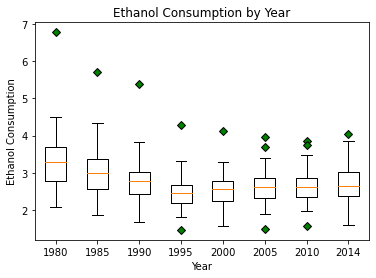

In [36]:
data_by_year4 = [df_concat_hiv_aids4_1980['Gallons of ethanol per capita age 21 and older'], 
                df_concat_hiv_aids4_1985['Gallons of ethanol per capita age 21 and older'],
                df_concat_hiv_aids4_1990['Gallons of ethanol per capita age 21 and older'],
                df_concat_hiv_aids4_1995['Gallons of ethanol per capita age 21 and older'],
                df_concat_hiv_aids4_2000['Gallons of ethanol per capita age 21 and older'],
                df_concat_hiv_aids4_2005['Gallons of ethanol per capita age 21 and older'],
                df_concat_hiv_aids4_2010['Gallons of ethanol per capita age 21 and older'],
                df_concat_hiv_aids4_2014['Gallons of ethanol per capita age 21 and older']]

year_labels = ['1980','1985','1990','1995','2000','2005','2010','2014']

# Format outlier marker
green_format = dict(markerfacecolor='g', marker='D')

# Plot the data
fig, ax = plt.subplots()
ax.set_title('Ethanol Consumption by Year')
ax.set_ylabel('Ethanol Consumption')
ax.set_xlabel('Year')
ax.boxplot(data_by_year4, flierprops=green_format, labels=year_labels)

plt.show()

In [33]:
df_concat_substance4

,Year,FIPS_x,Type of beverage,Gallons of ethanol per capita age 21 and older,Mortality Rate,Location,Beverage ID,Beverage Type
3,1980,1,4,2.2423,3.85,Alabama,4,All Beverages
7,1980,2,4,4.4974,12.45,Alaska,4,All Beverages
11,1980,4,4,3.5985,6.80,Arizona,4,All Beverages
15,1980,5,4,2.1641,2.36,Arkansas,4,All Beverages
19,1980,6,4,3.9809,6.48,California,4,All Beverages
...,...,...,...,...,...,...,...,...
1615,2014,51,4,2.3733,9.67,Virginia,4,All Beverages
1619,2014,53,4,2.5248,13.79,Washington,4,All Beverages
1623,2014,54,4,1.9785,24.83,West Virginia,4,All Beverages
1627,2014,55,4,3.3634,12.67,Wisconsin,4,All Beverages


In [37]:
# Plotting line graph

# Create a groupby for Year
hiv_aids4_year_group = df_concat_hiv_aids4.groupby('Year')

sum_ethanol4 = pd.DataFrame(hiv_aids4_year_group["Gallons of ethanol per capita age 21 and older"].sum()).reset_index()
avg_ethanol4 = pd.DataFrame(hiv_aids4_year_group["Gallons of ethanol per capita age 21 and older"].mean()).reset_index()
avg_mortality4 = pd.DataFrame(hiv_aids4_year_group["Mortality Rate"].mean()).reset_index()

# Merge Dataframes
sum_ethanol_vs_avg_mortality4 = sum_ethanol4.merge(avg_mortality4, left_index = True, right_index = True)
avg_ethanol_vs_avg_mortality4 = avg_ethanol4.merge(avg_mortality4, left_index = True, right_index = True)

# Rename Year column, Drop extra year column
sum_ethanol_vs_avg_mortality4.rename(columns={"Year_x": "Year"}, inplace = True)
sum_ethanol_vs_avg_mortality4.drop(['Year_y'],axis=1, inplace = True)

avg_ethanol_vs_avg_mortality4.rename(columns={"Year_x": "Year"}, inplace = True)
avg_ethanol_vs_avg_mortality4.drop(['Year_y'],axis=1, inplace = True)

In [38]:
sum_ethanol_vs_avg_mortality4


,Year,Gallons of ethanol per capita age 21 and older,Mortality Rate
0,1980,160.4786,1.295714
1,1985,148.2088,2.183878
2,1990,136.7486,8.073469
3,1995,121.5620,12.586531
4,2000,124.8953,4.448980
5,2005,128.6436,3.662041
6,2010,130.7998,2.408367
7,2014,132.8911,2.024898


In [39]:
avg_ethanol_vs_avg_mortality4

,Year,Gallons of ethanol per capita age 21 and older,Mortality Rate
0,1980,3.275073,1.295714
1,1985,3.024669,2.183878
2,1990,2.790788,8.073469
3,1995,2.480857,12.586531
4,2000,2.548884,4.448980
5,2005,2.625380,3.662041
6,2010,2.669384,2.408367
7,2014,2.712063,2.024898


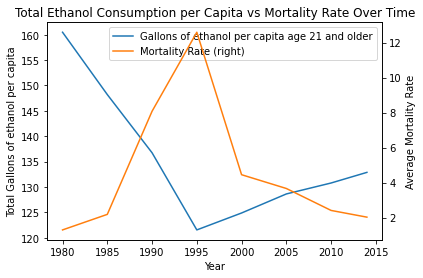

In [40]:
# Plot line graph: Total Ethanol Consumtion vs Avg Mortality

ax = sum_ethanol_vs_avg_mortality4.plot('Year','Gallons of ethanol per capita age 21 and older')
sum_ethanol_vs_avg_mortality4.plot('Year','Mortality Rate',secondary_y=True, ax=ax)

ax.set_ylabel('Total Gallons of ethanol per capita')
ax.right_ax.set_ylabel('Average Mortality Rate')
ax.set_xlabel('Year')
ax.set_title('Total Ethanol Consumption per Capita vs Mortality Rate Over Time')

plt.show()

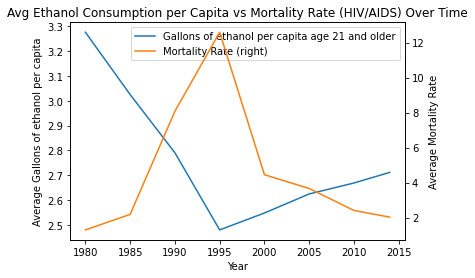

In [42]:
# Plot line graph: Avg Ethanol Consumtion vs Avg Mortality

ax = avg_ethanol_vs_avg_mortality4.plot('Year','Gallons of ethanol per capita age 21 and older')
avg_ethanol_vs_avg_mortality4.plot('Year','Mortality Rate',secondary_y=True, ax=ax)

ax.set_ylabel('Average Gallons of ethanol per capita')
ax.right_ax.set_ylabel('Average Mortality Rate')
ax.set_xlabel('Year')
ax.set_title('Avg Ethanol Consumption per Capita vs Mortality Rate (HIV/AIDS) Over Time')

plt.show()